# PHYS 411 - Homework 7
Due Tuesday October 25, 2022 at 9:30.

You can use these buttons below to launch this Jupyter notebook in either [binder](https://mybinder.org/) or [Colab](https://colab.research.google.com/).

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys411/main?urlpath=%2Ftree/Homework%207.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys411/blob/main/Homework%207.ipynb)

When you are finished with your work, please either print to a PDF file and submit via canvas, or submit the raw Jupyter notebook file. For full credit please be sure to clearly explain what you are doing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 - Atom internal magnetic field
1. Calculate the strength of the magnetic field $B$ at the nucleus of the hydrogen atom when the electron is in the $1\text{s} ^2\text{S}_{1/2}$ state and the $2\text{s} ^2\text{S}_{1/2}$ state. Remember, the magnetic field due to the spherically symmetric s state is:
$$
\vec{B}_e = -\frac{2}{3}g_s \mu_0 \mu_B \left|\psi_{ns}(0) \right|^2 \vec{s}
$$
2. Calculate the magnitude of the magnetic field that the electron experiences from it's orbital motion when it is in the 2p state of hydrogen, using the below equation:
$$
\vec{B} = \frac{\hbar}{m_e c^2} \frac{1}{e } \frac{e^2}{4\pi\epsilon_0 r^3} \vec{l}
$$


# Problem 2 - Hyperfine intervals
Consider the following energy levels for the 2s-2p transition in two different isotopes of lithium (not to scale).
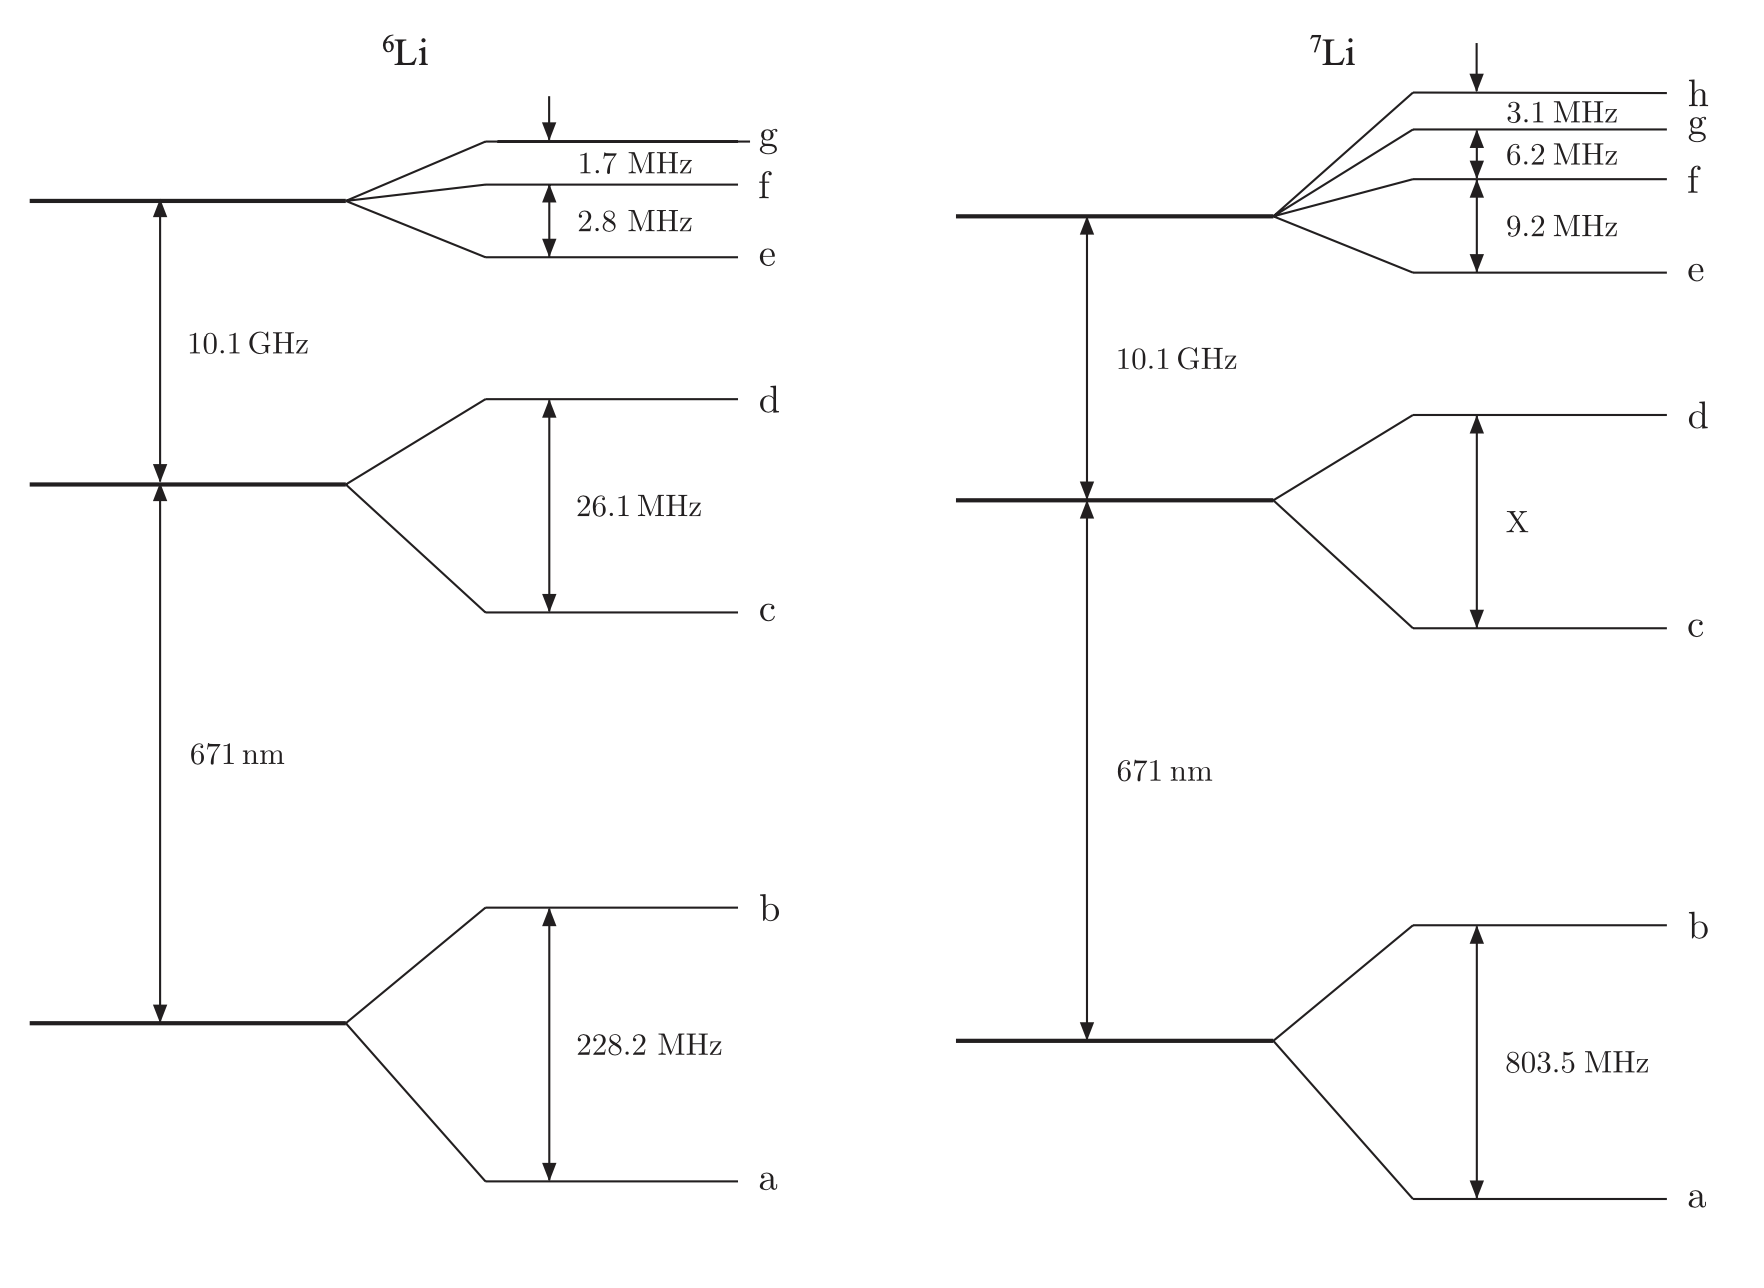

1. How large is the fine-structure splitting in the 2p state?
2. Why is the hyperfine splitting smaller than the fine-structure splitting in the 2p state? By approximately what factor?
3. What are the terms for the three different LS-coupled states?
4. What is the nuclear spin $I$ of each isotope?
5. Assign the quantum number $F$ for the states a-h
6. What is the value of $X$ (the hypefine splitting of the $^2\text{P}_{1/2}$ state of $^7$Li. To calculate this notice that the nuclear magnetic dipole moment is the same regardless of the electronic state, and that the electronic state (and hence the magnetic field it produces at the nucleus) is approximately the same for the different isotopes.

# Problem 3 - Hyperfine splitting at intermediate magnetic field
Calculate the hyperfine splitting of the ground state of $^{9}$Be$^+$ in a magnetic field.
To do this you will need to find the eigenvalues of the Hamiltonian
$$
H = A \vec{I} \cdot \vec{J} + g_J \mu_B \vec{J} \cdot \vec{B}
$$
where $A = h \times −625.008837044$ MHz. You can use the matrix method, representing your different eigenstates as basis vectors of an 8x8 matrix. To make things simpler, expand out $\vec{I} \cdot \vec{J}$ as
$$
\vec{I} \cdot \vec{J} = I_x J_x + I_y J_y + I_z J_z
$$
and assume the magnetic field points in the $\hat{z}$ direction to write
$$
\vec{J} \cdot \vec{B} = J_z B
$$
You can then represent products of operators of $I$ and $J$ as tensor products using the `kron` function (Kronecker product). Example: to represent $I_x J_x = I_x \otimes J_x$ we use `kron(Ix, Jx)`

In [4]:
kron(Ix, Jx)

array([[0.       , 0.       , 0.       , 0.4330127, 0.       , 0.       ,
        0.       , 0.       ],
       [0.       , 0.       , 0.4330127, 0.       , 0.       , 0.       ,
        0.       , 0.       ],
       [0.       , 0.4330127, 0.       , 0.       , 0.       , 0.5      ,
        0.       , 0.       ],
       [0.4330127, 0.       , 0.       , 0.       , 0.5      , 0.       ,
        0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.5      , 0.       , 0.       ,
        0.       , 0.4330127],
       [0.       , 0.       , 0.5      , 0.       , 0.       , 0.       ,
        0.4330127, 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.4330127,
        0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.4330127, 0.       ,
        0.       , 0.       ]])

and to represent $J_z = J_z \otimes I$ we use `kron(np.eye(4), Jz)` (the tensor product of $J_z$ and a $4\times4$ identity matrix

In [5]:
kron(np.eye(4), Jz)

array([[ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. , -0. ,  0. , -0. ,  0. , -0. ],
       [ 0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0. ,  0. , -0.5,  0. , -0. ,  0. , -0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. , -0. ,  0. , -0. ,  0. , -0.5,  0. , -0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ],
       [ 0. , -0. ,  0. , -0. ,  0. , -0. ,  0. , -0.5]])

1. What is $g_J$ for the ground state?
2. Use the definitions below for the components of $\vec{I}$ and $\vec{J}$ to calculate the $8 \times 8$ Hamiltonian $H$ for different values of magnetic field magnitude $B = 0$ gauss and $B = 1000$ gauss (0.1 T).
3. Find the eigenenergies in each case by using the `eigvalsh` function. Report the energies in units of $h \times $ MHz.
4. Calculate the eigenenergies for a range of magnetic fields between 0 and 1000 gauss, and make a figure of all the energies, with energy plotted on the vertical axis in units of MHz, and magnetic field on the horizontal axis in units of gauss. Label the figure with values of $F$, $m_F$, $m_I$ and $m_J$ where appropriate, depending on the magnetic field.
5. Identiy the avoided crossing on your figure. What causes it. Why do some states appear to not be affected by the avoided crossing?

You may find this expression for the Bohr magneton useful, $\mu_B = 1.399 h \times $MHz/gauss

In [6]:
from numpy import sqrt, kron
from scipy.linalg import eigvalsh

Ix = np.array([ [0, sqrt(3/4), 0, 0],
                [sqrt(3/4), 0, 1, 0],
                [0, 1, 0, sqrt(3/4)],
                [0, 0, sqrt(3/4), 0]])
Iy = np.array([ [0, -sqrt(3/4), 0, 0],
                [sqrt(3/4), 0, -1, 0],
                [0, 1, 0, -sqrt(3/4)],
                [0, 0, sqrt(3/4), 0]])*1j
Iz = np.array([ [3/2, 0, 0, 0],
                [0, 1/2, 0, 0],
                [0, 0, -1/2, 0],
                [0, 0, 0, -3/2]])
Jx = np.array([ [0, 1/2],
                [1/2, 0]])
Jy = np.array([ [0, -1/2],
                [1/2, 0]])*1j
Jz = np.array([ [1/2, 0],
                [0, -1/2]])